# Plotting Terminal container unloading times for all Terminals

In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import sys
import datetime as dt
sys.path.insert(0, ".")

from src.plotting import NB_RC_PARAMS, set_style
set_style()
from src import constants
from matplotlib import pyplot as plt
import os

def save_fig(name):
    plt.savefig(os.path.join("05-RateOfUnloading", name), dpi=220)

## Read DF and add datetime to IOTERMIN

In [3]:
df = pd.read_csv('data/q3.csv')

df['slot-datetime'] = pd.to_datetime(df['IOTERMIN'], infer_datetime_format=True)
df['slot-date'] = df['slot-datetime'].dt.date

In [4]:
df.head()

,şÿCONTAINER,CONTAINERISOCODE,CONTAINERBRUTTOGEWICHT,VERWENDUNG,KENNZEICHENGEFAHRGUT,TERMINAL,SLOTTERMIN,IOTERMIN,slot-datetime,slot-date
0,OOLU2909264,22G1,"14,193",EX,0,Q,01.07.2019 06:00,NaN,NaT,NaT
1,MRKU0879444,42GP,"3,8",DA,0,M,01.07.2019 06:00,01.07.2019 06:05,2019-01-07 06:05:00,2019-01-07
2,MRKU0697440,42GP,"3,8",DA,0,M,01.07.2019 06:00,01.07.2019 06:54,2019-01-07 06:54:00,2019-01-07
3,OOLU9043567,L5G0,"23,5",EX,0,X,01.07.2019 06:00,01.07.2019 05:50,2019-01-07 05:50:00,2019-01-07
4,OOLU0502541,NaN,"20,034",IM,0,M,01.07.2019 06:00,01.07.2019 06:14,2019-01-07 06:14:00,2019-01-07


ValueError: operands could not be broadcast together with shapes (55314,) (55313,) 

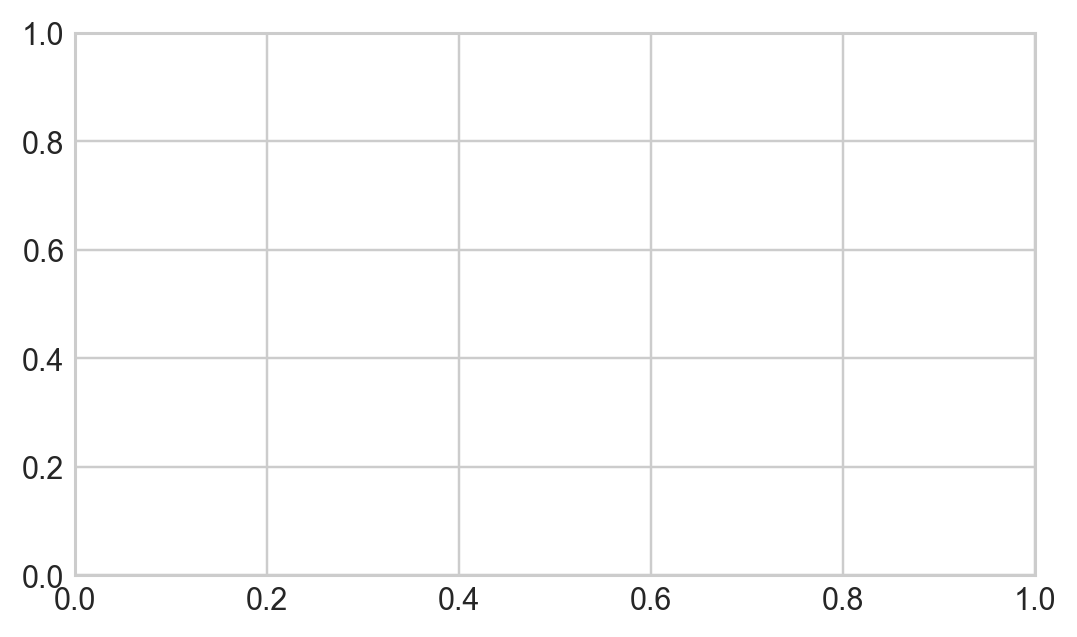

In [8]:
NB_RC_PARAMS.update({"figure.figsize": [5, 3]})
with plt.rc_context(NB_RC_PARAMS):
    fig, ax = plt.subplots(1, 1)

    for terminal in df['TERMINAL'].unique():

        oneterminal = df[df['TERMINAL'] == terminal]
        date_mask = (df['slot-date'] > start_date) & (df['slot-date'] <= end_date)
        oneterminal = oneterminal.loc[date_mask]
        
        start_date = dt.date(2019, 7, 1)
        end_date = dt.date(2019, 9, 30)
        df_diffed = oneterminal['slot-datetime'].sort_values().diff().dropna().dt.total_seconds()



        y = oneterminal['slot-datetime'].sort_values().dropna()
        diffs = (y - y.iloc[0]).dt.total_seconds() / 3600/24
        ticks = np.arange(len(diffs))
        y = ticks
        x = diffs
        
        dx = x[1:] - x[0:-1]
        dy = y[1:] - y[0:-1]
        dfx = dx/dy
        ax.plot(x[0:-1], dfx, label=terminal + "Terminal")
        ax.set_xlabel("time in days")
        ax.set_ylabel("# containers unloaded")

    ax.legend(frameon=True, framealpha=1.0)
